In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/malicious-and-benign-websites/security.csv


In [2]:
dt = pd.read_csv("/kaggle/input/malicious-and-benign-websites/security.csv")
dt.head()

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CACHE_CONTROL,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATE_CITY,WHOIS_REG_YEAR,...,REMOTE_IPS,APP_BYTES,UDP_PACKETS,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,TIPO
0,B0_113,17,6,ISO-8859-1,nginx,NaN,162,US,California,1997,...,3,3812,0,39,37,18784,4380,39,8,Benigna
1,B0_403,17,6,UTF-8,Apache/2.2.0 (Fedora),"max-age=269, must-revalidate",124140,US,Texas,1996,...,5,4278,0,61,62,129889,4586,61,4,Benigna
2,B0_2064,18,7,UTF-8,nginx,NaN,11260,CN,Shanxi,2017,...,9,894,0,11,13,838,894,11,0,Benigna
3,B0_462,18,6,iso-8859-1,Apache/2,NaN,345,US,Colorado,2002,...,3,1189,0,14,13,8559,1327,14,2,Benigna
4,B0_1128,19,6,us-ascii,Microsoft-HTTPAPI/2.0,NaN,324,US,Florida,1997,...,0,0,0,0,0,0,0,0,0,Benigna


In [3]:
dt.shape
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1611 entries, 0 to 1610
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   URL                        1611 non-null   object
 1   URL_LENGTH                 1611 non-null   int64 
 2   NUMBER_SPECIAL_CHARACTERS  1611 non-null   int64 
 3   CHARSET                    1604 non-null   object
 4   SERVER                     1611 non-null   object
 5   CACHE_CONTROL              908 non-null    object
 6   CONTENT_LENGTH             1611 non-null   int64 
 7   WHOIS_COUNTRY              1611 non-null   object
 8   WHOIS_STATE_CITY           1611 non-null   object
 9   WHOIS_REG_YEAR             1611 non-null   int64 
 10  UPDATE_YEAR                1611 non-null   int64 
 11  DOMAIN_NAME                1611 non-null   object
 12  TCP_CONVERSATION_EXCHANGE  1611 non-null   int64 
 13  DIST_REMOTE_TCP_PORT       1611 non-null   int64 
 14  REMOTE_I

In [4]:
missing_vals = dt.isnull().sum()
missing_vals

URL                            0
URL_LENGTH                     0
NUMBER_SPECIAL_CHARACTERS      0
CHARSET                        7
SERVER                         0
CACHE_CONTROL                703
CONTENT_LENGTH                 0
WHOIS_COUNTRY                  0
WHOIS_STATE_CITY               0
WHOIS_REG_YEAR                 0
UPDATE_YEAR                    0
DOMAIN_NAME                    0
TCP_CONVERSATION_EXCHANGE      0
DIST_REMOTE_TCP_PORT           0
REMOTE_IPS                     0
APP_BYTES                      0
UDP_PACKETS                    0
SOURCE_APP_PACKETS             0
REMOTE_APP_PACKETS             0
SOURCE_APP_BYTES               0
REMOTE_APP_BYTES               0
APP_PACKETS                    0
DNS_QUERY_TIMES                0
TIPO                           0
dtype: int64

In [5]:
description = dt.describe(include='all')
description

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CACHE_CONTROL,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATE_CITY,WHOIS_REG_YEAR,...,REMOTE_IPS,APP_BYTES,UDP_PACKETS,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,TIPO
count,1611,1611.000000,1611.000000,1604,1611,908,1611.000000,1611,1611,1611.000000,...,1611.000000,1.611000e+03,1611.0,1611.000000,1611.000000,1.611000e+03,1.611000e+03,1611.000000,1611.000000,1611
unique,1611,NaN,NaN,8,118,141,NaN,43,160,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,B0_113,NaN,NaN,UTF-8,Apache/2.2.29 (Unix),"no-store, no-cache, must-revalidate, post-chec...",NaN,US,California,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Benigna
freq,1,NaN,NaN,597,286,158,NaN,1191,450,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1453
mean,NaN,58.051521,11.187461,NaN,NaN,NaN,11188.708876,NaN,NaN,2001.658597,...,2.965239,3.071903e+03,0.0,17.787089,17.998138,1.483835e+04,3.237232e+03,17.787089,2.155804,NaN
std,NaN,28.162183,4.700296,NaN,NaN,NaN,22997.397319,NaN,NaN,5.218352,...,3.390895,5.892612e+04,0.0,41.655940,45.957305,6.583941e+04,5.892877e+04,41.655940,2.883439,NaN
min,NaN,17.000000,6.000000,NaN,NaN,NaN,0.000000,NaN,NaN,1990.000000,...,0.000000,0.000000e+00,0.0,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,NaN
25%,NaN,39.000000,8.000000,NaN,NaN,NaN,1825.500000,NaN,NaN,1997.000000,...,0.000000,0.000000e+00,0.0,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,NaN
50%,NaN,50.000000,10.000000,NaN,NaN,NaN,11260.000000,NaN,NaN,2001.000000,...,2.000000,6.180000e+02,0.0,7.000000,8.000000,5.080000e+02,6.300000e+02,7.000000,0.000000,NaN
75%,NaN,69.000000,13.000000,NaN,NaN,NaN,11260.000000,NaN,NaN,2005.000000,...,5.000000,2.314000e+03,0.0,26.000000,24.000000,9.661500e+03,2.635500e+03,26.000000,4.000000,NaN


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

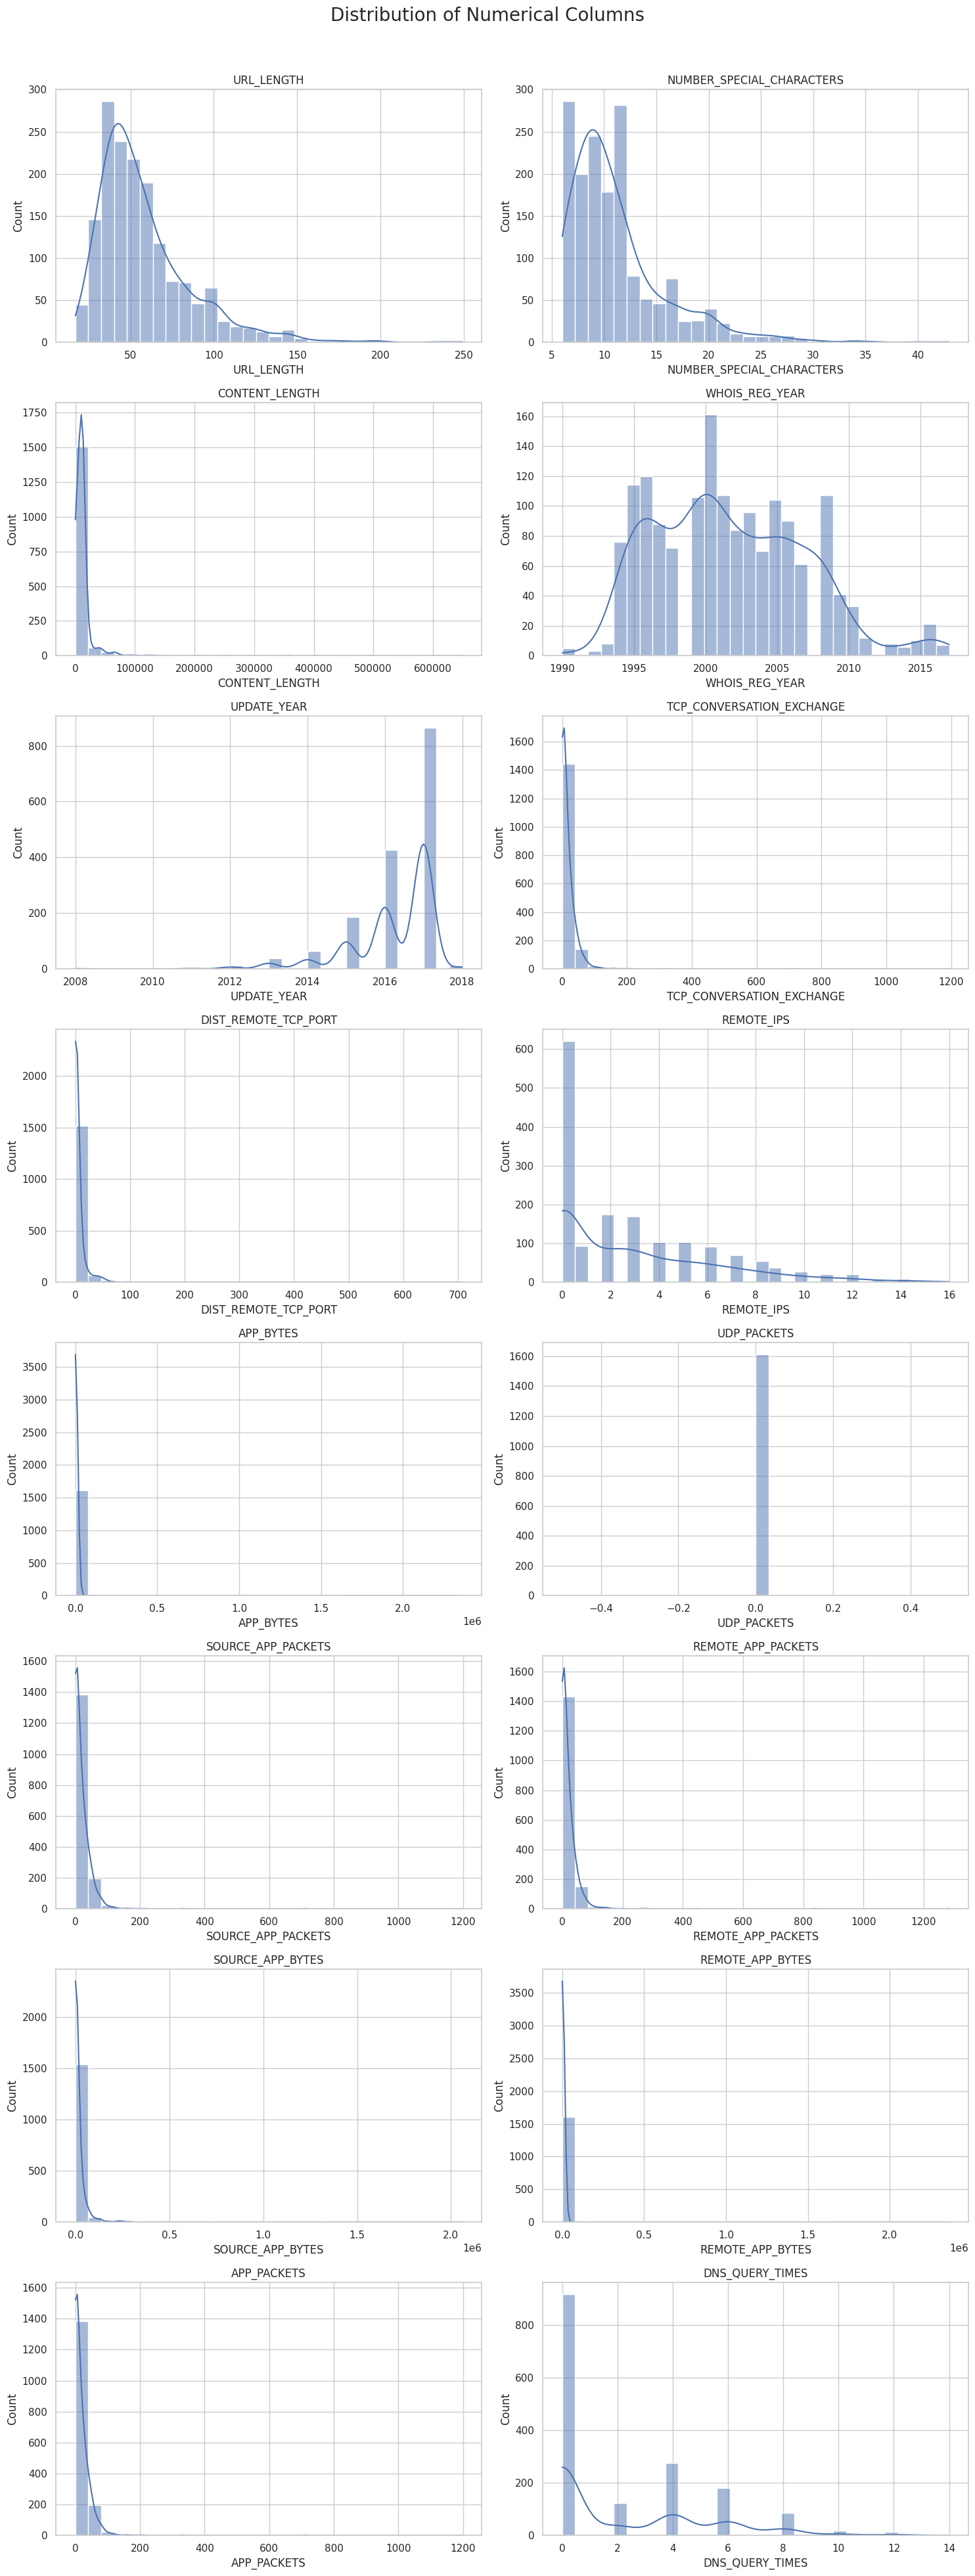

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 

# Set plot style
sns.set(style="whitegrid")

# List of numerical columns
numerical_columns = [
    'URL_LENGTH', 'NUMBER_SPECIAL_CHARACTERS', 'CONTENT_LENGTH',
    'WHOIS_REG_YEAR', 'UPDATE_YEAR', 'TCP_CONVERSATION_EXCHANGE',
    'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS', 'APP_BYTES', 'UDP_PACKETS',
    'SOURCE_APP_PACKETS', 'REMOTE_APP_PACKETS', 'SOURCE_APP_BYTES',
    'REMOTE_APP_BYTES', 'APP_PACKETS', 'DNS_QUERY_TIMES'
]

# Plot histograms for numerical columns
fig, axes = plt.subplots(nrows=8, ncols=2, figsize=(15, 40))
fig.suptitle('Distribution of Numerical Columns', fontsize=20)

for ax, col in zip(axes.flatten(), numerical_columns):
    sns.histplot(dt[col], bins=30, kde=True, ax=ax)
    ax.set_title(col)

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()
